**Problem statement**

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis

In [21]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [3]:
#Mounting from google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Dataset has 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
#path for train and test data
train_path="gdrive/My Drive/SkinData/Train/"
test_path="gdrive/My Drive/SkinData/Test/"
data_dir_train = pathlib.Path(train_path)
data_dir_test = pathlib.Path(test_path)

In [5]:
#Image count for both train and test
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


**Data** **Preparation**

In [6]:
#Assign Batch size, Image height and Image Width
batch_size = 32
img_height = 180
img_width = 180

Creating Train Data set

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


Validation Data set

In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


In [9]:
#Categorize Class Names
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


**Data Visualization**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


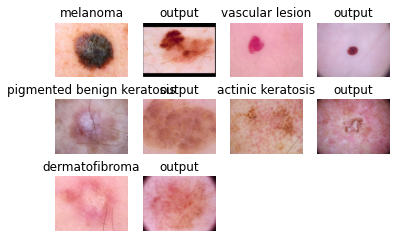

In [20]:
import matplotlib.pyplot as plt
num=0
for dirpath, dirnames, filenames in os.walk(str(train_path)):
    for filename in [f for f in filenames if f.endswith(".jpg")][:1]:
        img = PIL.Image.open(str(dirpath)+"/"+str(filename))
       
        plt.subplot(3,4,num+1)
        plt.title(str(dirpath).split('/')[-1])
        plt.axis('off')
        plt.imshow(img)
        if num < 9:
          num=num+1

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

AUTOTUNE , which will prompt the tf. data runtime to tune the value dynamically at runtime

**Model Creation**




Model 0

In [12]:
model=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

Model Compilation

Choosing Adam optimizer and categorical_crossentrophy loss function

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model Training**

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 744s 879ms/step - loss: 2.0697 - accuracy: 0.2977 - val_loss: 1.5468 - val_accuracy: 0.4239
Epoch 2/20
169/169 [==============================] - 7s 39ms/step - loss: 1.4052 - accuracy: 0.4694 - val_loss: 1.3770 - val_accuracy: 0.5167
Epoch 3/20
169/169 [==============================] - 6s 38ms/step - loss: 1.2257 - accuracy: 0.5467 - val_loss: 1.2310 - val_accuracy: 0.5256
Epoch 4/20
169/169 [==============================] - 6s 38ms/step - loss: 1.0821 - accuracy: 0.6052 - val_loss: 1.0385 - val_accuracy: 0.6355
Epoch 5/20
169/169 [==============================] - 6s 38ms/step - loss: 0.9125 - accuracy: 0.6690 - val_loss: 0.9907 - val_accuracy: 0.6496
Epoch 6/20
169/169 [==============================] - 6s 38ms/step - loss: 0.7963 - accuracy: 0.7209 - val_loss: 0.8147 - val_accuracy: 0.7127
Epoch 7/20
169/169 [==============================] - 7s 39ms/step - loss: 0.6344 - accuracy: 0.7778 - val_loss: 0.7508 - val_accuracy: 0.7

Layer Summary

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                    

**Result Visualization**

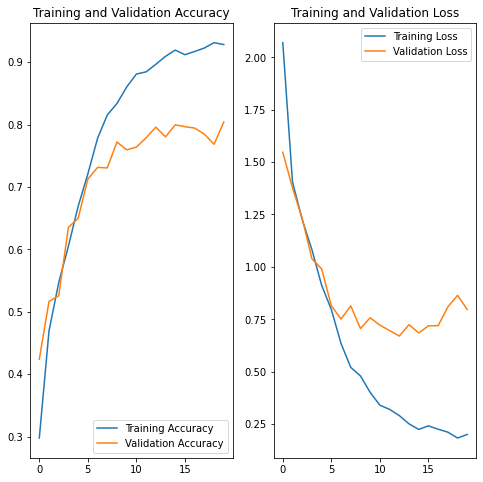

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Observation**



1. Training Accuracy is 92%.
2. Validation data accuracy is only 80% validatioin loss is very high.
3. observed overfit in the model.
4. We could add some Dropout layers and remove the BatchNormalization layers.



**Model 1**

**Model Creation**

In [17]:
model_update=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
                             
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

**Model Compilation**

In [18]:
model_update.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

**Model Training**

In [19]:
epochs = 20
history = model_update.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 18s 96ms/step - loss: 2.2258 - accuracy: 0.1354 - val_loss: 2.1895 - val_accuracy: 0.1418
Epoch 2/20
169/169 [==============================] - 15s 90ms/step - loss: 2.1803 - accuracy: 0.1456 - val_loss: 2.1886 - val_accuracy: 0.1359
Epoch 3/20
169/169 [==============================] - 15s 89ms/step - loss: 2.1478 - accuracy: 0.1723 - val_loss: 2.0928 - val_accuracy: 0.2249
Epoch 4/20
169/169 [==============================] - 15s 91ms/step - loss: 2.0044 - accuracy: 0.2209 - val_loss: 1.9045 - val_accuracy: 0.2702
Epoch 5/20
169/169 [==============================] - 15s 90ms/step - loss: 1.8406 - accuracy: 0.2836 - val_loss: 1.7538 - val_accuracy: 0.2829
Epoch 6/20
169/169 [==============================] - 15s 90ms/step - loss: 1.7487 - accuracy: 0.3158 - val_loss: 1.7267 - val_accuracy: 0.3378
Epoch 7/20
169/169 [==============================] - 15s 89ms/step - loss: 1.6684 - accuracy: 0.3705 - val_loss: 1.8081 - val_accuracy:

**Visualizing Result**

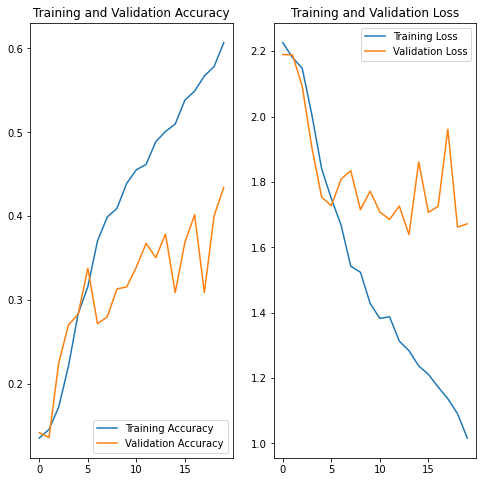

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Observation**

1. Model accuracy for Train data set has dropped to nearly 32%.
2. Validation data set accuracy is at 44%.
3. Model performed well without overfitting compared to previous model.

**Data Augmentation**

**Augmentation Specification**

In [21]:
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)
])

**Data Visualization**

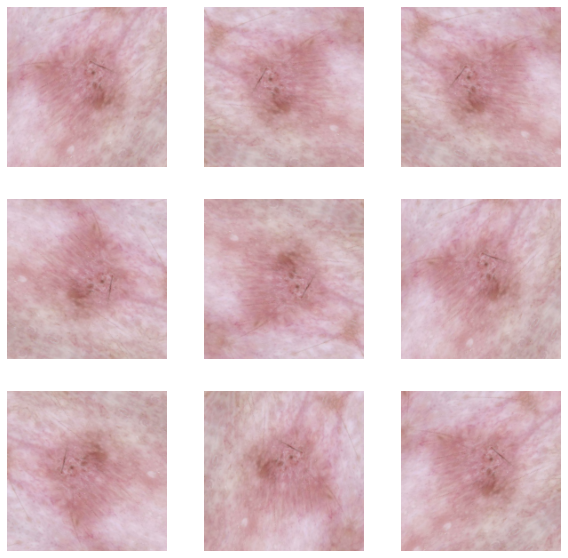

In [22]:
image, label = next(iter(train_ds))
image=np.array(image,np.int32)  
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  augmented_image1=np.array(augmented_image[0],np.int32)  
  plt.imshow((augmented_image1))
  plt.axis("off")

**Model 2**

Model Creation

In [23]:
model_augmented=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         

    data_augmentation,

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

Model Compilation

In [24]:
model_augmented.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

Model Training

In [25]:
epochs = 20
history = model_augmented.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 17s 94ms/step - loss: 2.1902 - accuracy: 0.1387 - val_loss: 2.1108 - val_accuracy: 0.1938
Epoch 2/20
169/169 [==============================] - 16s 93ms/step - loss: 2.0505 - accuracy: 0.2146 - val_loss: 1.9254 - val_accuracy: 0.2658
Epoch 3/20
169/169 [==============================] - 16s 93ms/step - loss: 1.8109 - accuracy: 0.2949 - val_loss: 1.8249 - val_accuracy: 0.3036
Epoch 4/20
169/169 [==============================] - 16s 93ms/step - loss: 1.6873 - accuracy: 0.3442 - val_loss: 1.8134 - val_accuracy: 0.3281
Epoch 5/20
169/169 [==============================] - 16s 94ms/step - loss: 1.6378 - accuracy: 0.3685 - val_loss: 1.6966 - val_accuracy: 0.3586
Epoch 6/20
169/169 [==============================] - 16s 93ms/step - loss: 1.5913 - accuracy: 0.3891 - val_loss: 1.6024 - val_accuracy: 0.4053
Epoch 7/20
169/169 [==============================] - 16s 93ms/step - loss: 1.5336 - accuracy: 0.4078 - val_loss: 1.6820 - val_accuracy:

Model Visualization

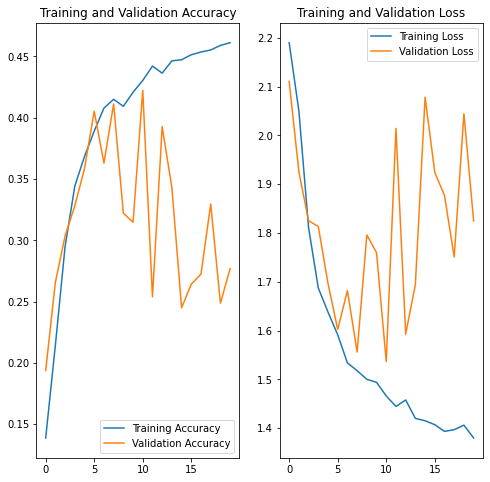

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Observation**

1. Train model accuracy is 48%.
2. seems same for the validation accuracy 48%.
3. Much better model compared to the previous two models as there seems to be No Overfit with the training accuracy 48% and validation accuracy at 48%.
4. Data Augmentation has improved the model performance.

**Class Imbalance Check**

In [28]:
for i in class_names:
    directory =train_path+i+'/'
    class_directory = pathlib.Path(directory)
    length=len(list(class_directory.glob('*.jpg')))
    print(f'{i} has {length} samples.')

actinic keratosis has 114 samples.
basal cell carcinoma has 376 samples.
dermatofibroma has 95 samples.
melanoma has 438 samples.
nevus has 357 samples.
pigmented benign keratosis has 462 samples.
seborrheic keratosis has 77 samples.
squamous cell carcinoma has 181 samples.
vascular lesion has 139 samples.


1. Samples of various classes are not in equal proportion.
2. Significant Class Imbalance observed.
3. The class with the least number of samples is Seborrheic Keratosis with 77.
4. The class that dominates the data in terms of proportionate number of 
5. samples is Pigmented Benign Keratosis with sample size of 438.

**Augmentor for Class Imbalance Treatment**

Augmentor Installation

In [29]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use Augmentor, the following general procedure is followed:

1. Instantiate a Pipeline object pointing to a directory containing your initial image data set.
2. Define a number of operations to perform on this data set using your Pipeline object.
3. Execute these operations by calling the Pipeline’s sample() method.

Using Augmentor

In [30]:
path_to_training_dataset=train_path
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/SkinData/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3128327550>: 100%|██████████| 500/500 [00:23<00:00, 21.35 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/SkinData/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F3128327190>: 100%|██████████| 500/500 [00:18<00:00, 27.02 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/SkinData/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F31282FB910>: 100%|██████████| 500/500 [00:18<00:00, 26.52 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/SkinData/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F312B345D90>: 100%|██████████| 500/500 [01:20<00:00,  6.21 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/SkinData/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7F312AC4D750>: 100%|██████████| 500/500 [01:16<00:00,  6.57 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/SkinData/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F31282B1590>: 100%|██████████| 500/500 [00:18<00:00, 27.21 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/SkinData/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F312B2DAF90>: 100%|██████████| 500/500 [00:45<00:00, 11.03 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/SkinData/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F312B2DAFD0>: 100%|██████████| 500/500 [00:19<00:00, 26.21 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/SkinData/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F312834AF50>: 100%|██████████| 500/500 [00:18<00:00, 26.84 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [31]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


In [32]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [33]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [34]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [35]:
for i in class_names:
    directory =train_path+i+'/'
    directory_out =train_path+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob('*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

actinic keratosis has 1114 samples.
basal cell carcinoma has 1376 samples.
dermatofibroma has 1095 samples.
melanoma has 1438 samples.
nevus has 1357 samples.
pigmented benign keratosis has 1462 samples.
seborrheic keratosis has 1077 samples.
squamous cell carcinoma has 1181 samples.
vascular lesion has 1139 samples.


Observations:
1. The Augmentor decrease the imbalance in class images and that can be viewed from above.
So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

**Modelling Augmented Data**

In [36]:
batch_size = 32
img_height = 180
img_width = 180

**Training Data Set**

In [37]:
data_dir_train=train_path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


**Validation Data set**

In [38]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


**Model 3**

**Model Creation**

In [39]:
model_final=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

**Model Compilation**

In [40]:
model_final.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

**Model Training**

In [41]:
epochs = 30
history = model_final.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
281/281 [==============================] - 50s 171ms/step - loss: 2.0305 - accuracy: 0.3263 - val_loss: 1.4747 - val_accuracy: 0.4597
Epoch 2/30
281/281 [==============================] - 47s 164ms/step - loss: 1.3514 - accuracy: 0.4966 - val_loss: 1.1538 - val_accuracy: 0.5937
Epoch 3/30
281/281 [==============================] - 46s 161ms/step - loss: 1.1248 - accuracy: 0.5840 - val_loss: 1.0051 - val_accuracy: 0.6498
Epoch 4/30
281/281 [==============================] - 46s 161ms/step - loss: 0.9143 - accuracy: 0.6707 - val_loss: 1.0725 - val_accuracy: 0.6248
Epoch 5/30
281/281 [==============================] - 46s 161ms/step - loss: 0.7759 - accuracy: 0.7189 - val_loss: 0.8162 - val_accuracy: 0.7076
Epoch 6/30
281/281 [==============================] - 46s 160ms/step - loss: 0.6484 - accuracy: 0.7593 - val_loss: 0.7604 - val_accuracy: 0.7356
Epoch 7/30
281/281 [==============================] - 46s 160ms/step - loss: 0.5610 - accuracy: 0.7923 - val_loss: 0.6005 - val_ac

**Model Visualization**

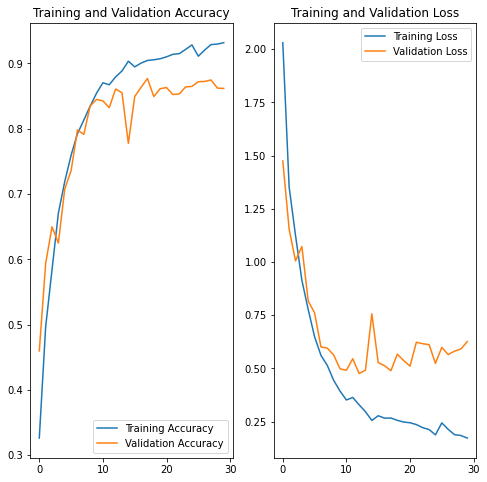

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Conclusion**
Observation:
1. Training Accuracy is at 94%
2. Validation Accuracy is at 86%
3. Model accuracy has improved
4. Class rebalance treats the overfitting


